In [1]:
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns

def open_csv(file_name):
    collection = []
    with open(file_name, "r") as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
    
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')

In [2]:
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine =  pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()

In [3]:
df_combine['Dalc'] = df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc'] = df_combine['Walc'].apply(pd.to_numeric)

df_combine

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
1040,391,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
1041,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7
1042,393,MS,M,18,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


### 1) Which ages drink the most? Look at age groups of students that drink and find a few age numbers where drinking is more commmon.


In [4]:
count_age = df_combine['age'].value_counts()
count_age


16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

 From this, we can see that there are very few students aged 19-22, so we will consider them as outliers.

In [5]:
# group by ages of average alcohol consumption for weekdays and weekends
grouped_Dalc = df_combine.groupby('age')['Dalc'].mean().reset_index()
grouped_Walc = df_combine.groupby('age')['Walc'].mean().reset_index()

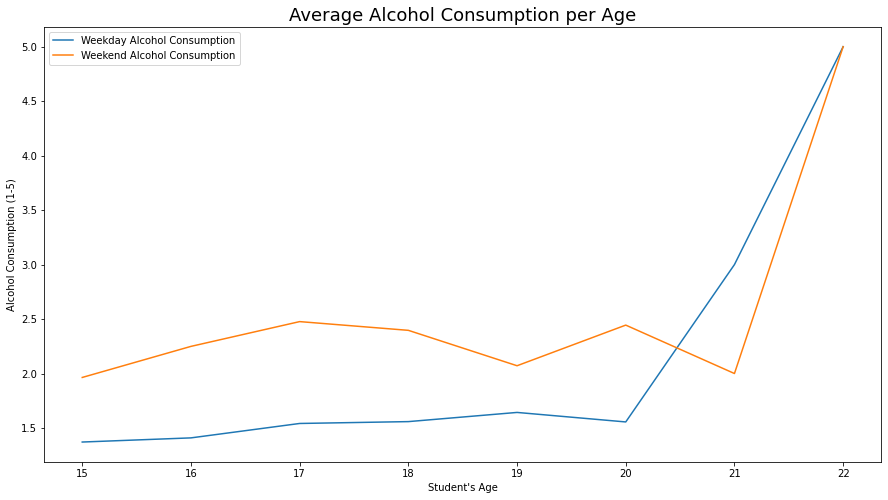

In [6]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=grouped_Dalc["age"], y=grouped_Dalc["Dalc"])
sns.lineplot(x=grouped_Walc["age"], y=grouped_Walc["Walc"])
plt.title("Average Alcohol Consumption per Age", size=18)
plt.xlabel("Student's Age")
plt.ylabel("Alcohol Consumption (1-5)")
plt.legend(["Weekday Alcohol Consumption", "Weekend Alcohol Consumption"])

###

As we can see from the chart above, substantially more students from ages 15-18 drink more on weekends (with the age 17 being the most), compared to weekdays. This makes sense since the majority of kids typically have parties or meet with friends on weekends and have the time available to do so, resulting in more alcohol consumption because of that. The students also have to go to school on weekdays, which also explains why consumption is low during weekdays.

### 6) Does family size impact whether or not students will drink? Compare large family sizes of kids that drink to small sized families of kids that drink and see if there is a trend or pattern.

In [7]:
df_combine 

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
1040,391,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
1041,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7
1042,393,MS,M,18,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


In [8]:

dalc_famsize = df_combine.groupby('famsize')['Dalc'].mean().reset_index()
dalc_famsize

,famsize,Dalc
0,GT3,1.449864
1,LE3,1.601307


In [9]:
walc_famsize = df_combine.groupby('famsize')['Walc'].mean().reset_index()
walc_famsize

,famsize,Walc
0,GT3,2.210027
1,LE3,2.464052


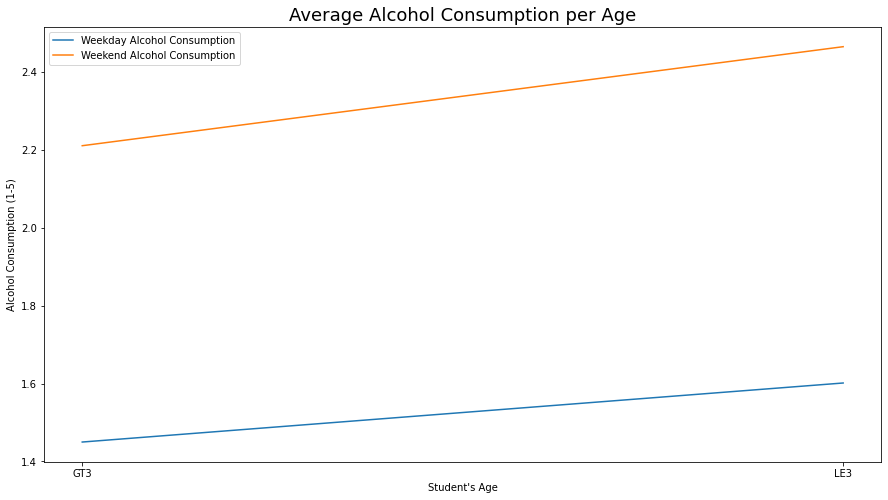

In [10]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=dalc_famsize["famsize"], y=dalc_famsize["Dalc"])
sns.lineplot(x=walc_famsize["famsize"], y=walc_famsize["Walc"])
plt.title("Average Alcohol Consumption per Age", size=18)
plt.xlabel("Student's Age")
plt.ylabel("Alcohol Consumption (1-5)")
plt.legend(["Weekday Alcohol Consumption", "Weekend Alcohol Consumption"])

From the graph and charts above, we can see that average alcohol consumption for students is quite low, regardless of whether it is a weekend or weekday, ranging from 1.46 to 2.46. However, it also seems that families with less than 3 people drink more than families with more than 3 people (by a margin of 0.2). So, in conclusion, yes family size can impact whether or not a student will drink. In a family of less than 3 people, the student will have a higher tendency to drink (0.2 more on the scale) compared to a student with a family size of more than 3 people.